In [1]:
import networkx as nx
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset

import matplotlib.pyplot as plt

"""Returns a random graph using Barabási–Albert preferential attachment

    A graph of $n$ nodes is grown by attaching new nodes each with $m$
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    initial_graph : Graph or None (default)
        Initial network for Barabási–Albert algorithm.
        It should be a connected graph for most use cases.
        A copy of `initial_graph` is used.
        If None, starts from a star graph on (m+1) nodes.

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy ``1 <= m < n``, or
        the initial graph number of nodes m0 does not satisfy ``m <= m0 <= n``.

    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

In [2]:
t = [10, 50,100,300,500,1000,1e4, 1e5]
k_i=[[]]
p_k=[]

In [3]:
@py_random_state(2)
def barabasi_albert_analysis(n, m, seed=None, initial_graph=None, t=[], k_i=[[]], p_k = []):
    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    if initial_graph is None:
        # Default initial graph : star graph on (m + 1) nodes
        G = nx.star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(
                f"Barabási–Albert initial graph needs between m={m} and n={n} nodes"
            )
        G = initial_graph.copy()

    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = [n for n, d in G.degree() for _ in range(d)] # se il nodo 0 è legato a 3 nodi e l'1 a 2 allora è (0,0,0,1,1,...)
    # Start adding the other n - m0 nodes.
    source = len(G)
    #
    i = []
    #
    while source < n:
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets)) # [10]*2 = [10, 10]
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)
   #     
        if source in t:
            i += [source]
            k_i += [[]]
            p_k += [list(G.degree)]
        
        iter = 0
        for I in i:
            k_i[iter] += [G.degree[I-1]]
            iter += 1
        
        #nx.draw(G, with_labels=True)
        #plt.show()
    #
        source += 1
    return G

In [4]:
n=1e6
m=4
BA = barabasi_albert_analysis(n,m, t=t, k_i=k_i, p_k = p_k)

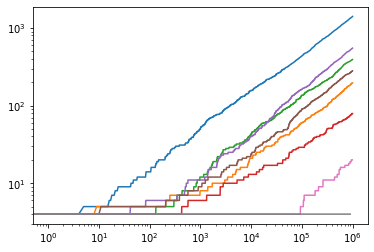

In [8]:
from scipy.optimize import curve_fit
import numpy as np

def linear_law(x, a, b):
    return a+b*x

for i in range(len(t)):
    x = list(range(len(k_i[i])))
    for j in range(len(x)):
        x[j] + t[i]
    lists = plt.plot(x, k_i[i]) # per default i bins sono settati a 10
#for h in range(0,1e6, 100):
  #  plt.plot(h,h^(0.5),'g')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [12]:
p_k[0][:]

[(0, 8),
 (1, 1),
 (2, 5),
 (3, 7),
 (4, 3),
 (5, 7),
 (6, 6),
 (7, 6),
 (8, 5),
 (9, 4),
 (10, 4)]

0.5840331507833039


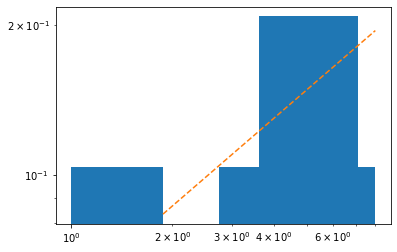

-0.788345842404343


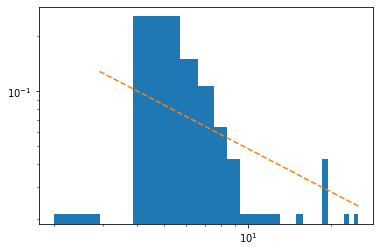

-0.8620070984056635


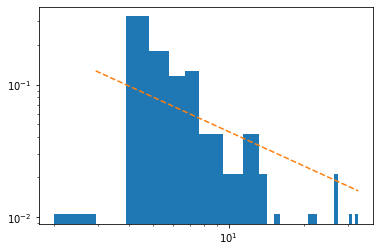

-1.4531262294673677


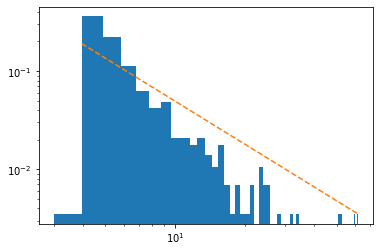

-3.2546368059535413


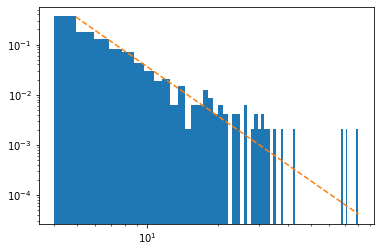

-3.230850248224395


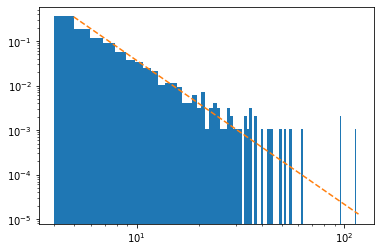

-3.0948121422788617


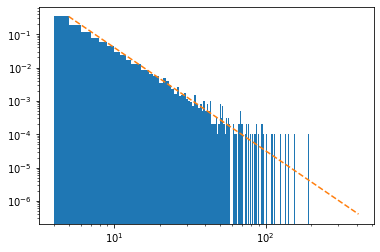

-3.0350258766110048


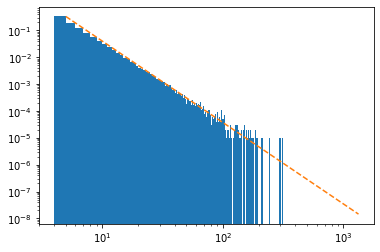

In [7]:
def power_law(x, a, b):
    return a*np.power(x, b)

for h in range(len(p_k)):
    p_k[h]
    y=[] 
    for k in range(len(p_k[h])):
        y += [p_k[h][k][1]]
    n, bins, patches = plt.hist(y, density=True, bins = max(y))
    
    # add a 'best fit' line
    
    popt, pcov = curve_fit(power_law, bins[1:], n)
    plt.plot(bins[1:], power_law(bins[1:], *popt), '--')
    print(popt[1])
    #y = mlab.normpdf( bins, mu, sigma)
    #plt.plot(bins, y, 'r--', linewidth=2)
    
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

